In [13]:
!ls

'latest?cb=20050408081934'   lights.jpg   'uc?export=download&id=1Ow7UtxZM8dq8cvfJfmohldRRL1lV1SrD'
 Lenna.jpg		     sample_data


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import io
from matplotlib import pyplot as plt

##Parameters input

In [25]:
!curl -O 'https://www.w3schools.com/w3images/lights.jpg'
!curl -O 'https://static.wikia.nocookie.net/computervision/images/3/34/Lenna.jpg'

imgpath = 'Lenna.jpg'
x0 = 100
y0 = 200
xn = 350
yn = 250
if x0 >= xn or y0 >= yn:
  print("Parametros invalidos")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20461  100 20461    0     0   107k      0 --:--:-- --:--:-- --:--:--  107k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25730  100 25730    0     0  29483      0 --:--:-- --:--:-- --:--:-- 29473


##Opening image

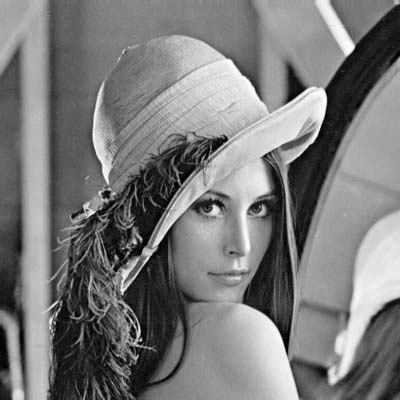

<function destroyAllWindows>

In [26]:
#open image in gray shade
gray_img = cv.imread(imgpath, cv.IMREAD_GRAYSCALE)
cv2_imshow(gray_img)
cv.waitKey
cv.destroyAllWindows

##integral image

In [27]:
#imagem integral algoritimo
#s(x,y) = i(x,y)+s(x-1,y)+s(x,y-1)-s(x-1,y-1)

class IntegralImage(object):
    def __init__(self, original):
        '''
        original list[list]: 2d array containing original table data
        '''
        width = len(original[0])
        height = len(original)
        self.table = [[0 for _ in range(width)] for _ in range(height)]

        for y in range(height):
            for x in range(width):
                self.table[y][x] = original[y][x] + self.get(x - 1, y) + self.get(x, y - 1) - self.get(x - 1, y - 1)

    def get(self, x, y):
        ''' Returns value of cell at x, y
        x (int): x position of cell
        y (int): y position of cell

        All rows/columns are zero-indexed from top-left
        If requested cell is out of range 0 will be returned

        Returns int
        '''
        if x < 0 or y < 0 or x >= len(self.table[0]) or y >= len(self.table):
            return 0
        else:
            return self.table[y][x]

    def box_sum(self, x, y, xn, yn):
        ''' Sums a box at x, y with width xn and height yn
        x0 (int): x position of cell
        y0 (int): y position of cell
        xn (int): width of box to sum
        yn (int): height of box to sum

        Returns int
        '''
        y += yn - 1
        x += xn- 1
        return self.get(x, y) - self.get(x, y - yn) - self.get(x - xn, y) + self.get(x - xn, y - yn)

    def __repr__(self):
        return ([''.join(['{:4}'.format(item) for item in row]) for row in self.table])

In [28]:
integral_image = IntegralImage(gray_img)

In [29]:
A = ((xn-x0)+1) * ((yn-y0)+1)
A

12801

###original image

array([[171, 171, 169, ..., 187, 173, 130],
       [172, 171, 170, ..., 179, 165, 126],
       [172, 171, 170, ..., 190, 177, 141],
       ...,
       [ 22,  25,  29, ...,  94,  88,  89],
       [ 20,  25,  30, ...,  99,  95,  97],
       [ 18,  24,  30, ..., 101, 101, 104]], dtype=uint8)
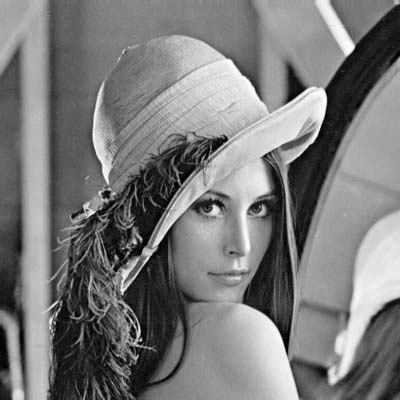

In [30]:
np.array(gray_img)

###integral image

In [31]:
np.array(integral_image.table)

array([[     171,      342,      511, ...,    55088,    55261,    55391],
       [     343,      685,     1024, ...,   110213,   110551,   110807],
       [     515,     1028,     1537, ...,   165356,   165871,   166268],
       ...,
       [   34066,    68180,   102334, ..., 19372674, 19424291, 19475952],
       [   34086,    68225,   102409, ..., 19417807, 19469519, 19521277],
       [   34104,    68267,   102481, ..., 19462864, 19514677, 19566539]])

In [32]:
integral_image.box_sum(x0, y0, xn, yn)

2377084

###Média da intensidade da imagem no retângulo

In [33]:
roi = gray_img[y0:y0+yn, x0:x0+xn]
cv.mean(roi)[0]

119.63458333333334

In [34]:
width = gray_img.shape[0]
height = gray_img.shape[1]

Transformada



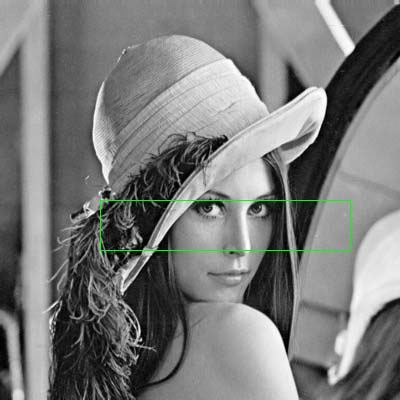


Gray



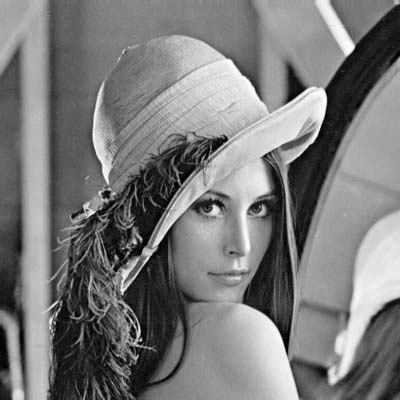

In [35]:
color_img = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)
for i in range (x0, xn):
  color_img[y0][i] = [0,255,0]
  color_img[yn][i] = [0,255,0]
for i in range (y0, yn):
  color_img[i][x0] = [0,255,0]
  color_img[i][xn] = [0,255,0]

print("Transformada\n")
cv2_imshow(color_img,)
print("\nGray\n")
cv2_imshow(gray_img,)
plt.show()